In [2]:
##### python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sn

In [3]:
def histogram(x, i, legend, xlabel, ylabel, colors):
    
    axs[i].hist(x, color=colors, label=legend, alpha=0.5)
    axs[i].set_xlabel(xlabel, size=12)
    axs[i].set_ylabel(ylabel, size=12)
    axs[i].axvline(x.mean(), color=colors, linewidth=1, linestyle='dashed')
    axs[i].legend(frameon=False)

    
def scatter_plot(x, y, i, xlabel, ylabel, colors):
    
    axs[i].scatter(x, y, color=colors, s=5)
    axs[i].set_xlabel(xlabel, size=12)
    axs[i].set_ylabel(ylabel, size=12)
    

def correlation_matrix(df, title):   
    
    sn.heatmap(corrMatrix_all, annot=True)
    ax.set_title(title, size=14)
    plt.tight_layout()
    
    return plt.show()


def t_test(x, y, alpha):

    t_statistic, pvalue = stats.ttest_ind(x, y, equal_var=False) ### Welch’s t-test, two-sided
    
    if pvalue < alpha:
        evaluate = 'significantly different'
    else:
        evaluate = 'not significant'
    
    return f'{male[column].name}: t-statistic: {"{:.4f}".format(t_statistic)}, p-value: {"{:.4f}".format(pvalue)}, {evaluate}'
    

def anova(alpha, *args):
    
    stat, pvalue = stats.f_oneway(*args)
    
    if pvalue < alpha:
        evaluate = 'significantly different'
    else:
        evaluate = 'not significant'
        
    return f'ANOVA: statistic = {"{:.4f}".format(stat)}, p-value = {"{:.4f}".format(pvalue)}, {evaluate}'

In [4]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
pd.notnull(insurance).count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


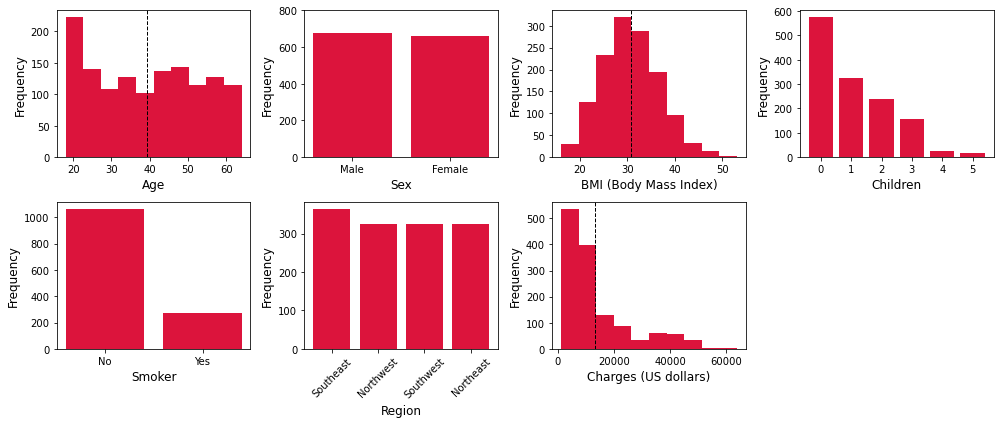

In [8]:
##### plots each categories overall 
fig, axs = plt.subplots(2,4,figsize=(14,6))

### age
axs[0,0].hist(insurance['age'], color='crimson')
#axs[0,0].set_title('Age')
axs[0,0].set_xlabel('Age', size=12)
axs[0,0].set_ylabel('Frequency', size=12)
axs[0,0].axvline(insurance['age'].mean(), color='black', linewidth=1, linestyle='dashed')

### sex
sx = insurance['sex'].value_counts()
#insurance['sex'].value_counts()[0]
#insurance['sex'].value_counts()[1]
#print(sx)
x = np.arange(len(sx))
bars = ['Male','Female']
axs[0,1].bar(x, sx, color='crimson')
#axs[0,1].set_title('Sex')
axs[0,1].set_xlabel('Sex', size=12)
axs[0,1].set_ylabel('Frequency', size=12)
axs[0,1].set_xticks(x)
axs[0,1].set_xticklabels(bars)
axs[0,1].set_ylim(0, 800)

### BMI
axs[0,2].hist(insurance['bmi'], color='crimson')
#axs[0,2].set_title('BMI')
axs[0,2].set_xlabel('BMI (Body Mass Index)', size=12)
axs[0,2].set_ylabel('Frequency', size=12)
axs[0,2].axvline(insurance['bmi'].mean(), color='black', linewidth=1, linestyle='dashed')

### children
child = insurance['children'].value_counts()
#print(child)
xc = np.arange(len(child))
barsc = np.array(np.arange(6))
axs[0,3].bar(xc, child, color='crimson')
#axs[0,3].set_title('Children')
axs[0,3].set_xlabel('Children', size=12)
axs[0,3].set_ylabel('Frequency', size=12)
axs[0,3].set_xticks(xc)
axs[0,3].set_xticklabels(barsc)

### smoker
smoker = insurance['smoker'].value_counts()
#print(smoker)
xsm = np.arange(len(smoker))
barssm = ['No','Yes']
axs[1,0].bar(xsm, smoker, color='crimson')
#axs[1,0].set_title('Smoker')
axs[1,0].set_xlabel('Smoker', size=12)
axs[1,0].set_ylabel('Frequency', size=12)
axs[1,0].set_xticks(xsm)
axs[1,0].set_xticklabels(barssm)

### region
region = insurance['region'].value_counts()
#print(region)
xr = np.arange(len(region))
barsr = ['Southeast','Northwest', 'Southwest', 'Northeast']
axs[1,1].bar(np.array(np.arange(4)), region, color='crimson')
#axs[1,1].set_title('Region')
axs[1,1].set_xlabel('Region', size=12)
axs[1,1].set_ylabel('Frequency', size=12)
axs[1,1].set_xticks(xr)
axs[1,1].set_xticklabels(barsr, rotation=45)

### charges
axs[1,2].hist(insurance['charges'], color='crimson')
#axs[1,2].set_title('Charges')
axs[1,2].set_xlabel('Charges (US dollars)', size=12)
axs[1,2].set_ylabel('Frequency', size=12)
axs[1,2].axvline(insurance['charges'].mean(), color='black', linewidth=1, linestyle='dashed')

fig.delaxes(ax= axs[1,3]) # delete empty plot.

plt.tight_layout()
plt.show()
#fig.savefig('overallgraphs.png')

In [9]:
##### trasform data
insurance_t = insurance.copy()
insurance_t['smoker'] = insurance_t['smoker'].apply(lambda x: 0 if x=='no' else 1)
insurance_t['sex'] = insurance_t['sex'].apply(lambda x: 0 if x=='male' else 1)
insurance_t['region'] = insurance_t['region'].apply(lambda x: 0 if x=='northeast' else x)
insurance_t['region'] = insurance_t['region'].apply(lambda x: 1 if x=='southeast' else x)
insurance_t['region'] = insurance_t['region'].apply(lambda x: 2 if x=='northwest' else x)
insurance_t['region'] = insurance_t['region'].apply(lambda x: 3 if x=='southwest' else x)
#print(insurance_t)
#print(insurance)

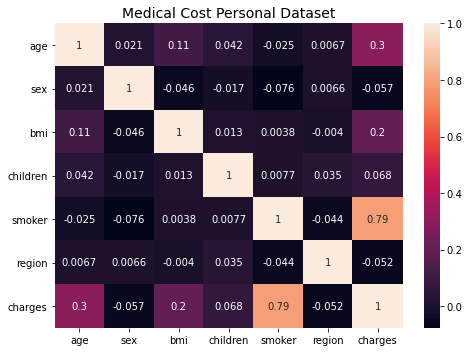

In [10]:
##### overall correlations
corrMatrix_all = insurance_t.corr()
#print (corrMatrix_all)

fig, ax = plt.subplots(figsize=(7,5))
correlation_matrix(corrMatrix_all, title='Medical Cost Personal Dataset')
#fig.savefig('overallcorrmatrix.png')

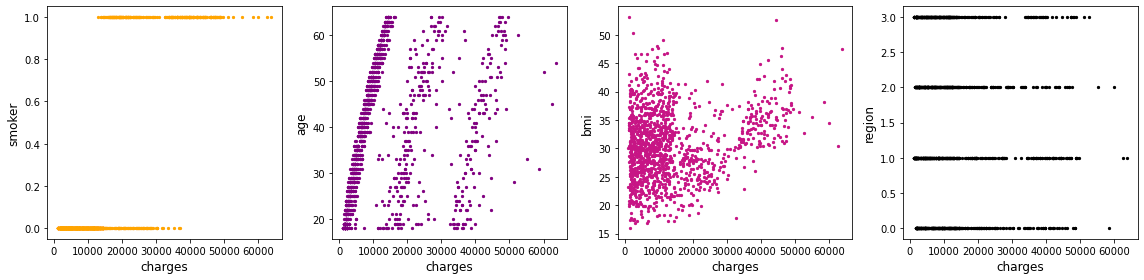

smoker: nonsmoker = 0, smoker = 1
region: northeast = 0, southeast = 1, northwest = 2, southwest = 3


In [11]:
##### scatter plot
fig, axs = plt.subplots(1,4,figsize=(16,4))

col1 = ['smoker', 'age', 'bmi', 'region']
colors = ['orange', 'purple', 'mediumvioletred', 'black']
for i in range(len(col1)):
    scatter_plot(insurance_t['charges'].values, insurance_t[col1[i]].values, i, 'charges', col1[i], colors[i])

plt.tight_layout()
plt.show()
print('smoker: nonsmoker = 0, smoker = 1')
print('region: northeast = 0, southeast = 1, northwest = 2, southwest = 3')

In [12]:
##### trasform and select data
insurance_t2 = insurance.copy()
insurance_t2['smoker'] = insurance_t2['smoker'].apply(lambda x: 0 if x=='no' else 1)
#insurance_t2['sex'] = insurance_t2['sex'].apply(lambda x: 0 if x=='male' else 1)
insurance_t2['region'] = insurance_t2['region'].apply(lambda x: 0 if x=='northeast' else x)
insurance_t2['region'] = insurance_t2['region'].apply(lambda x: 1 if x=='southeast' else x)
insurance_t2['region'] = insurance_t2['region'].apply(lambda x: 2 if x=='northwest' else x)
insurance_t2['region'] = insurance_t2['region'].apply(lambda x: 3 if x=='southwest' else x)
#print(insurance_t2.head())
#print(insurance.head())

male = insurance_t2[insurance_t2['sex'] == 'male'].reset_index()
#print(male.head())
female = insurance_t2[insurance_t2['sex'] == 'female'].reset_index()
#print(emale.head())

In [13]:
##### correlations
male_corr = male[['age', 'bmi', 'children', 'smoker', 'region', 'charges']]
corrMatrix_0 = male_corr.corr()
#print (corrMatrix_0)

female_corr = female[['age', 'bmi', 'children', 'smoker', 'region', 'charges']]
corrMatrix_1 = female_corr.corr()
#print (corrMatrix_1)

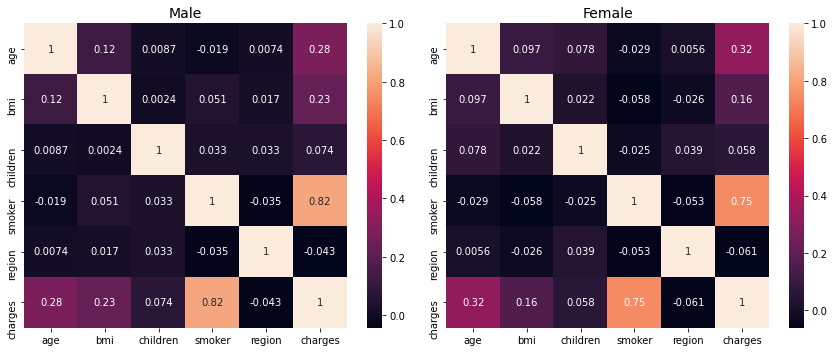

In [14]:
##### plot correlation matrix
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,5))

sn.heatmap(corrMatrix_0, ax=ax0, annot=True)
ax0.set_title('Male', size=14)
sn.heatmap(corrMatrix_1, ax=ax1, annot=True)
ax1.set_title('Female', size=14)
plt.tight_layout()
plt.show()
#fig.savefig('corrmatrix_gender.png')

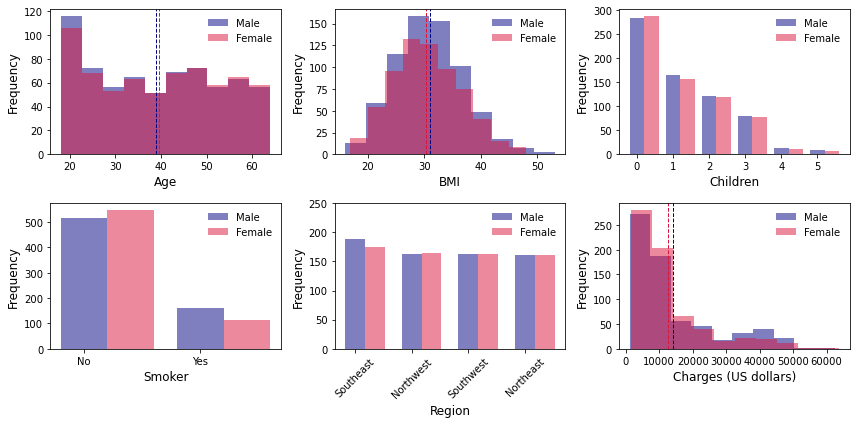

age: t-statistic: -0.7625, p-value: 0.4459, not significant
bmi: t-statistic: 1.6970, p-value: 0.0899, not significant
children: t-statistic: 0.6276, p-value: 0.5304, not significant
smoker: t-statistic: 2.7961, p-value: 0.0052, significantly different
region: t-statistic: -0.2427, p-value: 0.8083, not significant
charges: t-statistic: 2.1009, p-value: 0.0358, significantly different


In [15]:
##### plots categories bwtween male and female
insureplot = insurance.copy()
maleplot = insureplot[insureplot['sex'] == 'male'].reset_index()
femaleplot = insureplot[insureplot['sex'] == 'female'].reset_index()
#print(maleplot.head())
#print(femaleplot.head())

color1='navy'
color2='crimson'
fig, axs = plt.subplots(2,3,figsize=(12,6))

### age
axs[0,0].hist(maleplot['age'], color=color1, label='Male', alpha=0.5)
axs[0,0].hist(femaleplot['age'], color=color2, label='Female', alpha=0.5)
#axs[0,0].set_title('Age')
axs[0,0].set_xlabel('Age', size=12)
axs[0,0].set_ylabel('Frequency', size=12)
axs[0,0].axvline(maleplot['age'].mean(), color=color1, linewidth=1, linestyle='dashed')
axs[0,0].axvline(femaleplot['age'].mean(), color=color2, linewidth=1, linestyle='dashed')
axs[0,0].legend(frameon=False)

'''
### sex
smp = maleplot['sex'].value_counts()
print(smp)
xsm = np.arange(len(smp))
barms = ['Male']

sfp = femaleplot['sex'].value_counts()
print(sfp)
xsf = np.arange(len(sfp))
barfs = ['Female']

axs[0,1].bar(xsm + 0, smp, color=color1)
axs[0,1].bar(xsm + 1, sfp, color=color2)

#axs[0,1].set_title('Sex')
axs[0,1].set_xlabel('Sex', size=12)
axs[0,1].set_ylabel('Frequency', size=12)
axs[0,1].set_xticks(x)
axs[0,1].set_xticklabels(bars)
axs[0,1].set_ylim(0, 800)
'''

### BMI
axs[0,1].hist(maleplot['bmi'], color=color1, label='Male', alpha=0.5)
axs[0,1].hist(femaleplot['bmi'], color=color2, label='Female', alpha=0.5)
#axs[0,1].set_title('BMI')
axs[0,1].set_xlabel('BMI', size=12)
axs[0,1].set_ylabel('Frequency', size=12)
axs[0,1].axvline(maleplot['bmi'].mean(), color=color1, linewidth=1, linestyle='dashed')
axs[0,1].axvline(femaleplot['bmi'].mean(), color=color2, linewidth=1, linestyle='dashed')
axs[0,1].legend(frameon=False)


### children
childm = maleplot['children'].value_counts()
xmc = np.arange(len(childm))
barsmc = np.array(np.arange(6))

childf = femaleplot['children'].value_counts()
xfc = np.arange(len(childf))
barsfc = np.array(np.arange(6))

axs[0,2].bar(xmc + 0, childm, color=color1, label='Male', alpha=0.5, width=0.4)
axs[0,2].bar(xmc + 0.4, childf, color=color2, label='Female', alpha=0.5, width=0.4)
#axs[0,2].set_title('Children')
axs[0,2].set_xlabel('Children', size=12)
axs[0,2].set_ylabel('Frequency', size=12)
axs[0,2].set_xticks(xmc)
axs[0,2].set_xticklabels(barsmc)
axs[0,2].legend(frameon=False)


### smoker
smokerm = maleplot['smoker'].value_counts()
#print(smokerm)
xmsm = np.arange(len(smokerm))
barsmsm = ['No','Yes']

smokerf = femaleplot['smoker'].value_counts()
#print(smokerf)
xfsm = np.arange(len(smokerf))
barsfsm = ['No','Yes']

axs[1,0].bar(xmsm + 0, smokerm, color=color1, label='Male', alpha=0.5, width=0.4)
axs[1,0].bar(xmsm + 0.4, smokerf, color=color2, label='Female', alpha=0.5, width=0.4)
#axs[1,0].set_title('Smoker')
axs[1,0].set_xlabel('Smoker', size=12)
axs[1,0].set_ylabel('Frequency', size=12)
axs[1,0].set_xticks(xmsm)
axs[1,0].set_xticklabels(barsmsm)
axs[1,0].legend(frameon=False)


### region
regionm = maleplot['region'].value_counts()
xmr = np.arange(len(regionm))
barsmr = ['Southeast','Northwest', 'Southwest', 'Northeast']

regionf = femaleplot['region'].value_counts()
xfr = np.arange(len(regionf))
barsfr = ['Southeast','Northwest', 'Southwest', 'Northeast']

axs[1,1].bar(xmr + 0, regionm, color=color1, label='Male', alpha=0.5, width=0.35)
axs[1,1].bar(xmr + 0.35, regionf, color=color2, label='Female', alpha=0.5, width=0.35)
#axs[1,1].set_title('Region')
axs[1,1].set_xlabel('Region', size=12)
axs[1,1].set_ylabel('Frequency', size=12)
axs[1,1].set_xticks(xr)
axs[1,1].set_xticklabels(barsr, rotation=45)
axs[1,1].set_ylim(0, 250)
axs[1,1].legend(frameon=False)


### charges
axs[1,2].hist(maleplot['charges'], color=color1, label='Male', alpha=0.5)
axs[1,2].hist(femaleplot['charges'], color=color2, label='Female', alpha=0.5)
#axs[1,2].set_title('Charges')
axs[1,2].set_xlabel('Charges (US dollars)', size=12)
axs[1,2].set_ylabel('Frequency', size=12)
axs[1,2].axvline(maleplot['charges'].mean(), color=color1, linewidth=1, linestyle='dashed')
axs[1,2].axvline(femaleplot['charges'].mean(), color=color2, linewidth=1, linestyle='dashed')
axs[1,2].legend(frameon=False)

#fig.delaxes(ax= axs[1,3]) # delete empty plot.

plt.tight_layout()
plt.show()

##### statistics, p-value
col = ['age','bmi','children','smoker','region','charges']
for column in col:
    print(t_test(male[column].values, female[column].values, 0.05))

In [16]:
##### trasform and select data
insurance_t3 = insurance.copy()
#insurance_t3['smoker'] = insurance_t2['smoker'].apply(lambda x: 0 if x=='no' else 1)
insurance_t3['sex'] = insurance_t3['sex'].apply(lambda x: 0 if x=='male' else 1)
insurance_t3['region'] = insurance_t3['region'].apply(lambda x: 0 if x=='northeast' else x)
insurance_t3['region'] = insurance_t3['region'].apply(lambda x: 1 if x=='southeast' else x)
insurance_t3['region'] = insurance_t3['region'].apply(lambda x: 2 if x=='northwest' else x)
insurance_t3['region'] = insurance_t3['region'].apply(lambda x: 3 if x=='southwest' else x)
#print(insurance_t3.head())
#print(insurance.head())

nonsmoker = insurance_t3[insurance_t3['smoker'] == 'no'].reset_index()
smoker = insurance_t3[insurance_t3['smoker'] == 'yes'].reset_index()
#print(nonsmoker.head())
#print(smoker.head())

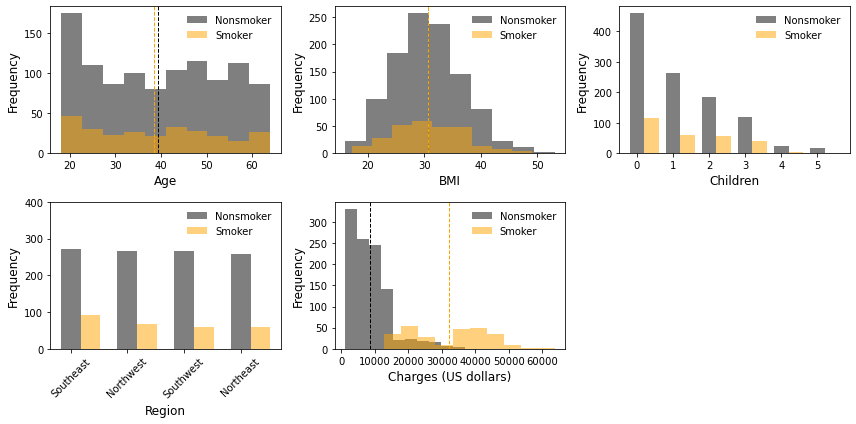

age: t-statistic: 0.9210, p-value: 0.3576, not significant
bmi: t-statistic: -0.1335, p-value: 0.8938, not significant
children: t-statistic: -0.2891, p-value: 0.7726, not significant
region: t-statistic: 1.6472, p-value: 0.1002, not significant
charges: t-statistic: -32.7519, p-value: 0.0000, significantly different


In [17]:
##### plots categories bwtween nonsmoker and smoker
nonsmokerplot = insureplot[insureplot['smoker'] == 'no'].reset_index()
smokerplot = insureplot[insureplot['smoker'] == 'yes'].reset_index()
#print(nonsmokerplot.head())
#print(smokerplot.head())

color1='black'
color2='orange'
fig, axs = plt.subplots(2,3,figsize=(12,6))

### age
axs[0,0].hist(nonsmokerplot['age'], color=color1, label='Nonsmoker', alpha=0.5)
axs[0,0].hist(smokerplot['age'], color=color2, label='Smoker', alpha=0.5)
#axs[0,0].set_title('Age')
axs[0,0].set_xlabel('Age', size=12)
axs[0,0].set_ylabel('Frequency', size=12)
axs[0,0].axvline(nonsmokerplot['age'].mean(), color=color1, linewidth=1, linestyle='dashed')
axs[0,0].axvline(smokerplot['age'].mean(), color=color2, linewidth=1, linestyle='dashed')
axs[0,0].legend(frameon=False)

'''
### sex
smp = maleplot['sex'].value_counts()
print(smp)
xsm = np.arange(len(smp))
barms = ['Male']

sfp = femaleplot['sex'].value_counts()
print(sfp)
xsf = np.arange(len(sfp))
barfs = ['Female']

axs[0,1].bar(xsm + 0, smp, color='navy')
axs[0,1].bar(xsm + 1, sfp, color='crimson')

#axs[0,1].set_title('Sex')
axs[0,1].set_xlabel('Sex', size=12)
axs[0,1].set_ylabel('Frequency', size=12)
axs[0,1].set_xticks(x)
axs[0,1].set_xticklabels(bars)
axs[0,1].set_ylim(0, 800)
'''

### BMI
axs[0,1].hist(nonsmokerplot['bmi'], color=color1, label='Nonsmoker', alpha=0.5)
axs[0,1].hist(smokerplot['bmi'], color=color2, label='Smoker', alpha=0.5)
#axs[0,1].set_title('BMI')
axs[0,1].set_xlabel('BMI', size=12)
axs[0,1].set_ylabel('Frequency', size=12)
axs[0,1].axvline(nonsmokerplot['bmi'].mean(), color=color1, linewidth=1, linestyle='dashed')
axs[0,1].axvline(smokerplot['bmi'].mean(), color=color2, linewidth=1, linestyle='dashed')
axs[0,1].legend(frameon=False)


### children
childm = nonsmokerplot['children'].value_counts()
xmc = np.arange(len(childm))
barsmc = np.array(np.arange(6))

childf = smokerplot['children'].value_counts()
xfc = np.arange(len(childf))
barsfc = np.array(np.arange(6))

axs[0,2].bar(xmc + 0, childm, color=color1, label='Nonsmoker', alpha=0.5, width=0.4)
axs[0,2].bar(xmc + 0.4, childf, color=color2, label='Smoker', alpha=0.5, width=0.4)
#axs[0,2].set_title('Children')
axs[0,2].set_xlabel('Children', size=12)
axs[0,2].set_ylabel('Frequency', size=12)
axs[0,2].set_xticks(xmc)
axs[0,2].set_xticklabels(barsmc)
axs[0,2].legend(frameon=False)

'''
### smoker
smokerm = maleplot['smoker'].value_counts()
#print(smokerm)
xmsm = np.arange(len(smokerm))
barsmsm = ['No','Yes']

smokerf = femaleplot['smoker'].value_counts()
#print(smokerf)
xfsm = np.arange(len(smokerf))
barsfsm = ['No','Yes']

axs[1,0].bar(xmsm + 0, smokerm, color='navy', label='Male', alpha=0.5, width=0.4)
axs[1,0].bar(xmsm + 0.4, smokerf, color='crimson', label='Female', alpha=0.5, width=0.4)
#axs[1,0].set_title('Smoker')
axs[1,0].set_xlabel('Smoker', size=12)
axs[1,0].set_ylabel('Frequency', size=12)
axs[1,0].set_xticks(xmsm)
axs[1,0].set_xticklabels(barsmsm)
axs[1,0].legend(frameon=False)
'''

### region
regionm = nonsmokerplot['region'].value_counts()
xmr = np.arange(len(regionm))
barsmr = ['Southeast','Northwest', 'Southwest', 'Northeast']

regionf = smokerplot['region'].value_counts()
xfr = np.arange(len(regionf))
barsfr = ['Southeast','Northwest', 'Southwest', 'Northeast']

axs[1,0].bar(xmr + 0, regionm, color=color1, label='Nonsmoker', alpha=0.5, width=0.35)
axs[1,0].bar(xmr + 0.35, regionf, color=color2, label='Smoker', alpha=0.5, width=0.35)
#axs[1,0].set_title('Region')
axs[1,0].set_xlabel('Region', size=12)
axs[1,0].set_ylabel('Frequency', size=12)
axs[1,0].set_xticks(xr)
axs[1,0].set_xticklabels(barsr, rotation=45)
axs[1,0].set_ylim(0, 400)
axs[1,0].legend(frameon=False)


### charges
axs[1,1].hist(nonsmokerplot['charges'], color=color1, label='Nonsmoker', alpha=0.5)
axs[1,1].hist(smokerplot['charges'], color=color2, label='Smoker', alpha=0.5)
#axs[1,1].set_title('Charges')
axs[1,1].set_xlabel('Charges (US dollars)', size=12)
axs[1,1].set_ylabel('Frequency', size=12)
axs[1,1].axvline(nonsmokerplot['charges'].mean(), color=color1, linewidth=1, linestyle='dashed')
axs[1,1].axvline(smokerplot['charges'].mean(), color=color2, linewidth=1, linestyle='dashed')
axs[1,1].legend(frameon=False)

fig.delaxes(ax= axs[1,2]) # delete empty plot.

plt.tight_layout()
plt.show()

##### statistics, p-value
col = ['age','bmi','children','region','charges']
for column in col:
    print(t_test(nonsmoker[column].values, smoker[column].values, 0.05))

In [18]:
##### trasform and select data
insurance_t4 = insurance.copy()
insurance_t4['smoker'] = insurance_t4['smoker'].apply(lambda x: 0 if x=='no' else 1)
insurance_t4['sex'] = insurance_t4['sex'].apply(lambda x: 0 if x=='male' else 1)
insurance_t4['region'] = insurance_t4['region'].apply(lambda x: 0 if x=='northeast' else x)
insurance_t4['region'] = insurance_t4['region'].apply(lambda x: 1 if x=='southeast' else x)
insurance_t4['region'] = insurance_t4['region'].apply(lambda x: 2 if x=='northwest' else x)
insurance_t4['region'] = insurance_t4['region'].apply(lambda x: 3 if x=='southwest' else x)
#print(insurance_t4.head())
#print(insurance.head())

In [19]:
##### BMI (Body Mass Index)
bins = [10, 20, 30, 40, 50, 60]
insurance_t4['binned'] = pd.cut(insurance_t4['bmi'], bins)
insurance_t4['bin_number'] = pd.cut(insurance_t4['bmi'], bins, labels=range(5))
b0 = insurance_t4[insurance_t4['bin_number'] == 0]
b1 = insurance_t4[insurance_t4['bin_number'] == 1]
b2 = insurance_t4[insurance_t4['bin_number'] == 2]
b3 = insurance_t4[insurance_t4['bin_number'] == 3]
b4 = insurance_t4[insurance_t4['bin_number'] == 4]

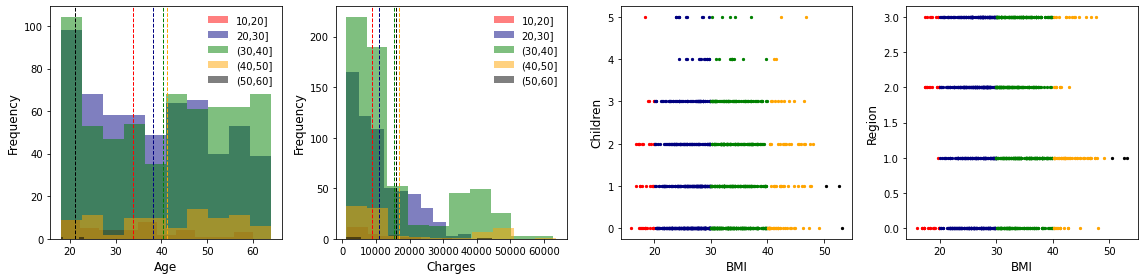

age: ANOVA: statistic = 5.0646, p-value = 0.0005, significantly different
charges: ANOVA: statistic = 14.4182, p-value = 0.0000, significantly different
children: ANOVA: statistic = 0.1797, p-value = 0.9490, not significant
region: ANOVA: statistic = 2.0785, p-value = 0.0814, not significant

region: northeast = 0, southeast = 1, northwest = 2, southwest = 3


In [20]:
##### plots categories bwtween BMI groups
dataframe = [b0, b1, b2, b3, b4]
colors = ['red', 'navy', 'green', 'orange', 'black']
legend = ['10,20]', '20,30]', '(30,40]', '(40,50]', '(50,60]']

fig, axs = plt.subplots(1,4,figsize=(16,4))

### age
for i in range(5):
    histogram(dataframe[i]['age'], 0, legend[i], 'Age', 'Frequency', colors[i])

### charges
for i in range(5):
    histogram(dataframe[i]['charges'], 1, legend[i], 'Charges', 'Frequency', colors[i])


### children
for i in range(5):
    scatter_plot(dataframe[i]['bmi'], dataframe[i]['children'], 2, 'BMI', 'Children', colors[i])


### region
for i in range(5):
    scatter_plot(dataframe[i]['bmi'], dataframe[i]['region'], 3, 'BMI', 'Region', colors[i])
    
plt.tight_layout()
plt.show()

##### ANOVA
col = ['age','charges','children','region']
for column in col:
    print(f'{column}:', anova(0.05, b0[column], b1[column], b2[column], b3[column], b4[column]))
print()
print('region: northeast = 0, southeast = 1, northwest = 2, southwest = 3')

In [21]:
#####